# Desafio 7

### Bibliotecas

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

### Leitura

In [2]:
train = pd.read_csv('train.csv').set_index('NU_INSCRICAO')
test = pd.read_csv('test.csv').set_index('NU_INSCRICAO')

### Seleção

In [3]:
columns = ['NU_IDADE', 'TP_ESCOLA', 'TP_ST_CONCLUSAO']
target = ['IN_TREINEIRO']

train = train[columns + target]
test = test[columns]

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13730 entries, ed50e8aaa58e7a806c337585efee9ca41f1eb1ad to 0af8939c470a600b30bdaa80375ee0db848b0e35
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   NU_IDADE         13730 non-null  int64
 1   TP_ESCOLA        13730 non-null  int64
 2   TP_ST_CONCLUSAO  13730 non-null  int64
 3   IN_TREINEIRO     13730 non-null  int64
dtypes: int64(4)
memory usage: 536.3+ KB


In [5]:
train.describe()

,NU_IDADE,TP_ESCOLA,TP_ST_CONCLUSAO,IN_TREINEIRO
count,13730.000000,13730.000000,13730.000000,13730.000000
mean,21.593809,1.353532,1.782666,0.129862
std,7.043654,0.558472,0.880734,0.336163
min,13.000000,1.000000,1.000000,0.000000
25%,17.000000,1.000000,1.000000,0.000000
50%,19.000000,1.000000,2.000000,0.000000
75%,23.000000,2.000000,2.000000,0.000000
max,67.000000,4.000000,4.000000,1.000000


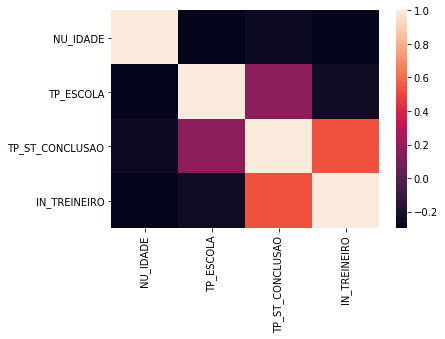

In [6]:
sns.heatmap(train.corr());

### Treinamento

In [7]:
train = train.dropna()
X = train.iloc[:, :-1].to_numpy()
y = train.iloc[:,  -1].to_numpy()

In [8]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
model.score(X, y) # accuracy

0.9941005098324837

### Predição

In [10]:
(test
  .assign(IN_TREINEIRO = model.predict(test.to_numpy()))
  [['IN_TREINEIRO']]
  .to_csv('answer.csv'))